**Title:** **UE20CS312 - Data Analytics - Worksheet 3b - AR and MA models**

*Vijay J, Dept. of CSE - PES2UG20CS815*

#Loading DataSet and Adding Library

In [ ]:
import pandas as pd
df = pd.read_csv('doge.csv')
df.head()

,Date,Price
0,2021-08-15,0.348722
1,2021-08-16,0.349838
2,2021-08-17,0.345208
3,2021-08-18,0.331844
4,2021-08-19,0.321622


In [65]:
import statsmodels.formula.api as smf

#PROBLEM 

##Problem 0 (0.5 point)

**Solution**

In [ ]:
df.set_index('Date', inplace=True)
df

,Price
Date,
2021-08-15,0.348722
2021-08-16,0.349838
2021-08-17,0.345208
2021-08-18,0.331844
2021-08-19,0.321622
...,...
2022-08-11,0.072978
2022-08-12,0.073563
2022-08-13,0.073670


##Problem 1 (1.5 point)


**Solution**

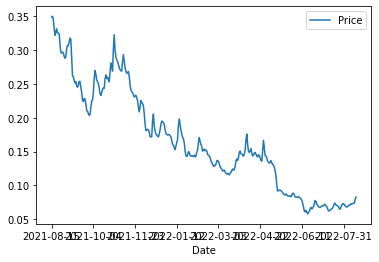

In [ ]:
df.plot ()

**Comment:**The time series plot is not stationary.

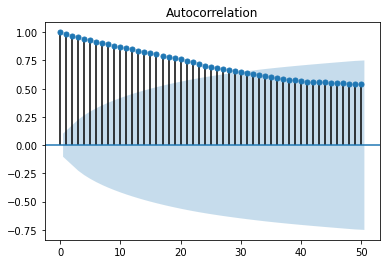

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=50)
plt.show()


**Comment:**The lines that have a correlation are positively correlated.

##Problem 2 (2 point)


**Solution**

In [66]:
def print_adf_results(adf_result):
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.558935
p-value: 0.504182
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


**Comment**:The p-value is around 0.5,therefore non-stationary.

In [ ]:
transformed_df = df.diff().dropna()
trans_adf = adfuller(transformed_df)
print_adf_results(trans_adf)

ADF Statistic: -5.593446
p-value: 0.000001
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


**Comment:**The p value is low. 

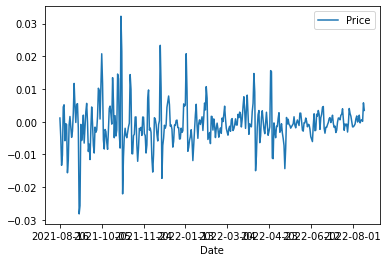

In [ ]:
transformed_df.plot()

##Problem 3 (1 point)

**Solution**

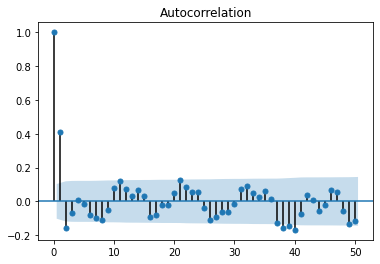

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(transformed_df, lags=50)
plt.show()

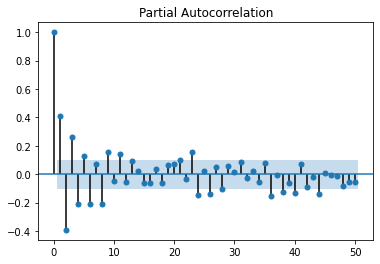

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_pacf(transformed_df, lags=50)
plt.show()

**Comment:**p=2 and q=1

##Problem 4 (2 point)

**Solution**

In [ ]:
### Adding columns for lagged values
arima_df = transformed_df.copy()
## AR terms
p = 2 # TODO: Initialise p to the value inferred from the ACF and PACF plot
# Creating p new columns, for p lagged values
for i in range(1,p+1):
    arima_df[f'Price_t-{i}'] = arima_df['Price'].shift(i)#TODO: Replace None with the p lagged value
#(Use shift function)
arima_df.dropna(inplace=True)
arima_df

,Price,Price_t-1,Price_t-2
Date,,,
2021-08-18,-0.013363,-0.004630,0.001116
2021-08-19,-0.010222,-0.013363,-0.004630
2021-08-20,0.004498,-0.010222,-0.013363
2021-08-21,0.005169,0.004498,-0.010222
2021-08-22,-0.005841,0.005169,0.004498
...,...,...,...
2022-08-11,0.000380,-0.000374,0.001993
2022-08-12,0.000585,0.000380,-0.000374
2022-08-13,0.000107,0.000585,0.000380


In [ ]:
X_train = arima_df[['Price_t-1', 'Price_t-2']].values
y_train = arima_df['Price'].values

In [ ]:
# TODO: Perform Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 0.57292128, -0.39148166])

In [ ]:
# Adding new column with predictions using the LR coefficients. The LR Coefficients are Alpha values or AR coefficients
arima_df['AR_Prediction'] = X_train.dot(lr.coef_.T) + lr.intercept_

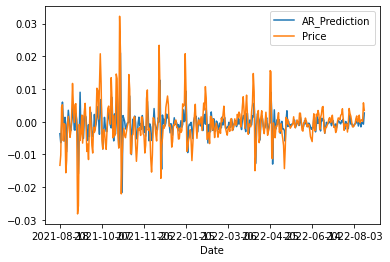

In [ ]:
arima_df
arima_df.plot(y=['AR_Prediction', 'Price'])

In [69]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df, order=(2,1,1))
res = model.fit()
res.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  366
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1440.153
Date:                Thu, 06 Oct 2022   AIC                          -2872.305
Time:                        17:11:00   BIC                          -2856.706
Sample:                    08-15-2021   HQIC                         -2866.106
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0540      0.048     -1.137      0.256      -0.147       0.039
ar.L2         -0.1093      0.052     -2.115      0.034      -0.211      -0.008
ma.L1          0.9396      0.021     43.763      0.000       0.898       0.982
sigma2      2.201e-05   7.48e-07     29.428      0.000    2.05e-05    2.35e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3047.97
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##Problem 5 (1 Point)

**Solution**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.Price, order = (2,1, 1)) 
res=model.fit()


In [ ]:
df['Predictions'] = res.predict(0, len(df)-1)
df.plot()

In [ ]:
res.forecast(20).plot()

##Problem 6 (1 point)

**Solution**

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True)

**Comment:**We fail to reject the null hypothesis because p is high.